In [3]:
#!pip install xgboost==0.7.post3

In [102]:
import pandas as pd
import numpy as np
import io

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.metrics import accuracy_score

In [103]:
SEED = 30051993

In [104]:
xgb.__version__

'0.7'

In [105]:
#train = pd.read_csv(io.StringIO(uploaded["train_u6lujuX_CVtuZ9i.csv"].decode("utf-8")))
#test = pd.read_csv(io.StringIO(uploaded["test_Y3wMUE5_7gLdaTN.csv"].decode("utf-8")))

In [106]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [107]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [108]:
display_all(test.tail(10).transpose())

,357,358,359,360,361,362,363,364,365,366
Loan_ID,LP002952,LP002954,LP002962,LP002965,LP002969,LP002971,LP002975,LP002980,LP002986,LP002989
Gender,Male,Male,Male,Female,Male,Male,Male,Male,Male,Male
Married,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No
Dependents,0,2,0,0,1,3+,0,0,0,0
Education,Graduate,Not Graduate,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,No,No,No,Yes,No,No,No,Yes
ApplicantIncome,2500,3132,4000,8550,2269,4009,4158,3250,5000,9200
CoapplicantIncome,0,0,2667,4255,2167,1777,709,1993,2393,0
LoanAmount,60,76,152,96,99,113,115,126,158,98
Loan_Amount_Term,360,360,360,360,360,360,360,360,360,180


In [109]:
test.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP002111,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367,NaN,NaN,NaN,4805.6,4910.69,0,2864,3786,5060,72529
CoapplicantIncome,367,NaN,NaN,NaN,1569.58,2334.23,0,0,1025,2430.5,24000
LoanAmount,362,NaN,NaN,NaN,136.133,61.3667,28,100.25,125,158,550
Loan_Amount_Term,361,NaN,NaN,NaN,342.537,65.1566,6,360,360,360,480


In [110]:
display_all(train.tail(10).transpose())

,604,605,606,607,608,609,610,611,612,613
Loan_ID,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,No,No,No,No,No,No,No,Yes
ApplicantIncome,12000,2400,3400,3987,3232,2900,4106,8072,7583,4583
CoapplicantIncome,0,3800,2500,1411,1950,0,0,240,0,0
LoanAmount,496,NaN,173,157,108,71,40,253,187,133
Loan_Amount_Term,360,180,360,360,360,360,180,360,360,360


In [111]:
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP002682,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [112]:
def preprocess(df, target_col=None):
  data = df.copy(deep=True)
  data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0}).fillna(-1).astype(int)
  data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0}).fillna(-1).astype(int)
  data['Dependents'] = data['Dependents'].str.rstrip('+').fillna(0).astype(int)
  data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
  data['Self_Employed'] = data['Self_Employed'].replace({'Yes': 1, 'No': 0}).fillna(-1).astype(int)
  data['LoanAmount'] = data['LoanAmount'].fillna(0)
  data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(0)
  data['Credit_History'] = data['Credit_History'].fillna(-1)
  data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
  if target_col and (target_col in data.columns):
    data[target_col] = data[target_col].replace({'Y':1, 'N': 0})
    
  # Feature 1
  data['Loan_Income_ratio'] = data['LoanAmount']/(data['ApplicantIncome']+data['CoapplicantIncome'])
  # Feature 2
  data['Income_per_dependent'] = (data['ApplicantIncome']+data['CoapplicantIncome'])/(data['Dependents']+1)
  return data

In [113]:
X_train = preprocess(train, 'Loan_Status')

In [114]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Income_ratio,Income_per_dependent
0,LP001002,1,0,0,1,0,5849,0.0,0.0,360.0,1.0,2,1,0.000000,5849.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0.021015,3045.5
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,0.022000,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0.024287,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0.023500,6000.0


In [115]:
X_test = preprocess(test)

In [116]:
X_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Income_ratio,Income_per_dependent
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,0.019231,5720.000000
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,0.027535,2288.000000
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,0.030588,2266.666667
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,-1.0,2,0.020467,1628.666667
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,0.023810,3276.000000


In [117]:
cols_for_model = np.setdiff1d(X_train.columns, ['Loan_ID', 'Loan_Status'])

In [118]:
cols_for_model

array(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
       'Dependents', 'Education', 'Gender', 'Income_per_dependent',
       'LoanAmount', 'Loan_Amount_Term', 'Loan_Income_ratio', 'Married',
       'Property_Area', 'Self_Employed'], dtype=object)

In [119]:
dtrain = xgb.DMatrix(X_train[cols_for_model], X_train['Loan_Status'])
dtest = xgb.DMatrix(X_test[cols_for_model])

In [120]:
def accuracy_metric(preds, data):
  labels = data.get_label()
  preds = np.where(preds > 0.5, 1, 0)
  return 'Accuracy', accuracy_score(labels, preds)

In [121]:
params = {'objective': 'binary:logistic',
          'booster': 'gbtree',
          'nthread': 4,
          'silent': 1,
          'max_depth': 6,
          'subsample': 0.9,
          'min_child_weight': 1,
          "colsample_bytree": 0.9,
          'eta': 0.1,
          'seed': SEED}

In [122]:
num_rounds = 1000
clf_xgb_cv = xgb.cv(params, dtrain, num_rounds, nfold=10, stratified=True, early_stopping_rounds=10, verbose_eval=True, feval=accuracy_metric)

[0]	train-Accuracy:0.844913+0.0075836	train-error:0.155086+0.0075836	test-Accuracy:0.757247+0.0408012	test-error:0.242753+0.0408012
[1]	train-Accuracy:0.852521+0.00870473	train-error:0.147479+0.00870473	test-Accuracy:0.786651+0.037554	test-error:0.213349+0.037554
[2]	train-Accuracy:0.853964+0.00711592	train-error:0.146036+0.00711592	test-Accuracy:0.793+0.0310112	test-error:0.207+0.0310112
[3]	train-Accuracy:0.853781+0.00612075	train-error:0.146219+0.00612075	test-Accuracy:0.797866+0.0345533	test-error:0.202134+0.0345533
[4]	train-Accuracy:0.854866+0.00579812	train-error:0.145134+0.00579812	test-Accuracy:0.799506+0.0309361	test-error:0.200494+0.0309361
[5]	train-Accuracy:0.856497+0.00523802	train-error:0.143504+0.00523802	test-Accuracy:0.806115+0.0271441	test-error:0.193885+0.0271441
[6]	train-Accuracy:0.856858+0.00446348	train-error:0.143142+0.00446348	test-Accuracy:0.807702+0.0258101	test-error:0.192298+0.0258101
[7]	train-Accuracy:0.858853+0.00697981	train-error:0.141147+0.00697981	t

In [123]:
clf_xgb_cv.tail()

,test-Accuracy-mean,test-Accuracy-std,test-error-mean,test-error-std,train-Accuracy-mean,train-Accuracy-std,train-error-mean,train-error-std
13,0.815847,0.030697,0.184153,0.030697,0.869524,0.005831,0.130476,0.005831
14,0.814208,0.029094,0.185792,0.029094,0.871152,0.004771,0.128848,0.004771
15,0.812568,0.029202,0.187432,0.029202,0.872419,0.004925,0.127581,0.004925
16,0.814208,0.029094,0.185792,0.029094,0.876582,0.004663,0.123418,0.004663
17,0.815847,0.033220,0.184153,0.033220,0.877666,0.005081,0.122334,0.005081


In [124]:
num_rounds = 4
watchlist = [(dtrain, 'train')]
clf_xgb = xgb.train(params, dtrain, num_rounds, evals=watchlist, verbose_eval=5, feval=accuracy_metric, maximize=True)

[0]	train-error:0.154723	train-Accuracy:0.845277
[3]	train-error:0.143322	train-Accuracy:0.856678


In [125]:
xgb_preds = clf_xgb.predict(dtest)
test_preds = np.where(xgb_preds > 0.5, 'Y', 'N')

In [126]:
submit2 = pd.DataFrame({'Loan_ID': X_test['Loan_ID'], 'Loan_Status': test_preds});submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [127]:
submit2.Loan_Status.value_counts(normalize=True)

Y    0.80654
N    0.19346
Name: Loan_Status, dtype: float64

In [128]:
submit2.to_csv("XGB2.csv",index=False)

In [129]:
%matplotlib inline

In [47]:
from matplotlib import pyplot as plt

In [48]:
feat_imp = pd.DataFrame(list(clf_xgb.get_fscore().items()), columns=['Feature', 'Score']).set_index('Feature').sort_values(by='Score', ascending=True)

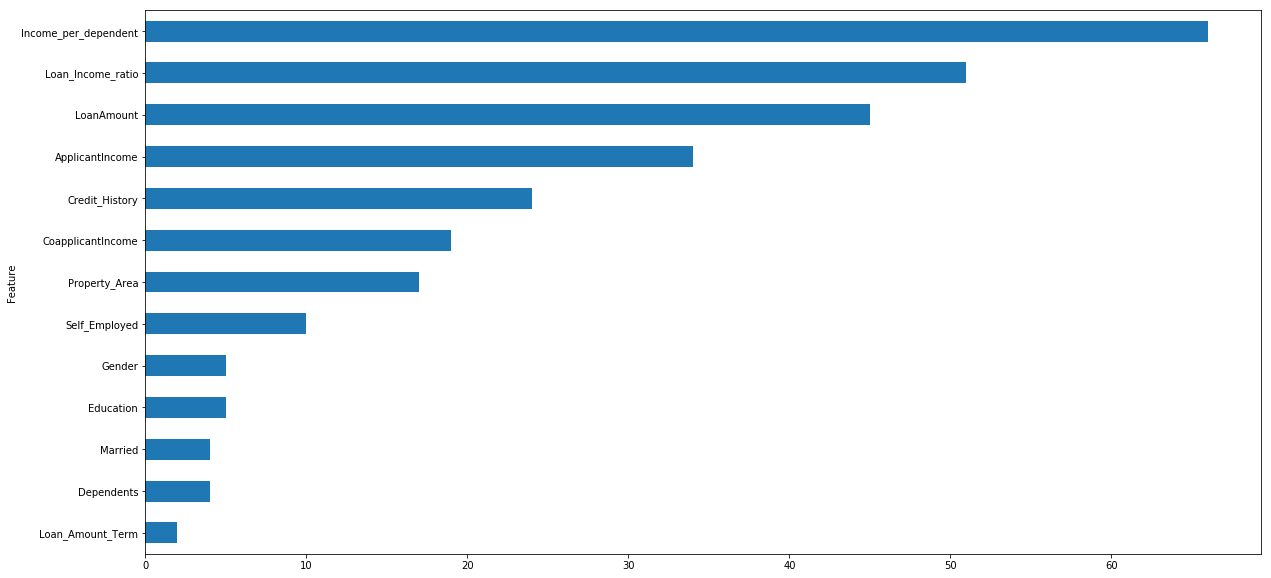

In [49]:
plt.figure(figsize=(20,10))
feat_imp['Score'].plot('barh');

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=20)

In [34]:
rf.fit(X_train[cols_for_model], X_train['Loan_Status'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rf_preds = rf.predict_proba(X_test[cols_for_model])[:, 1]

In [41]:
pd.Series(xgb_preds).corr(pd.Series(rf_preds))

0.8508835130048296